In [1]:
import pandas as pd
URL = "https://raw.githubusercontent.com/helianakhjavani/Neural-Networks-in-python/main/diabetes.csv"
df =pd.read_csv(URL)
print(df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


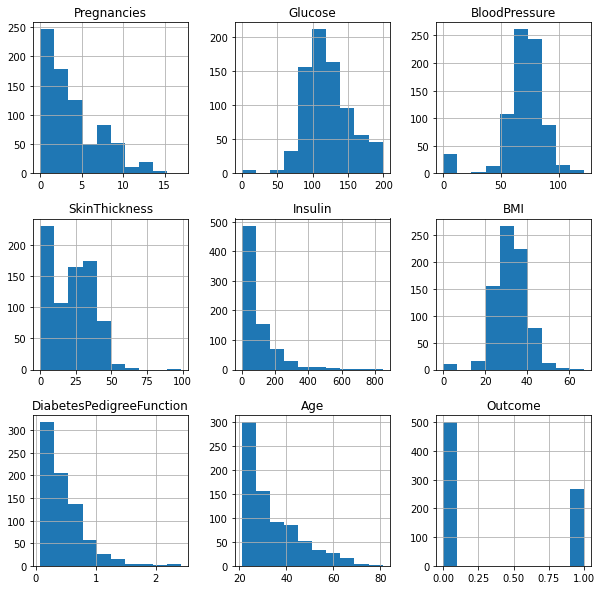

In [2]:
from matplotlib import pyplot as plt
df.hist(figsize= (10,10))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

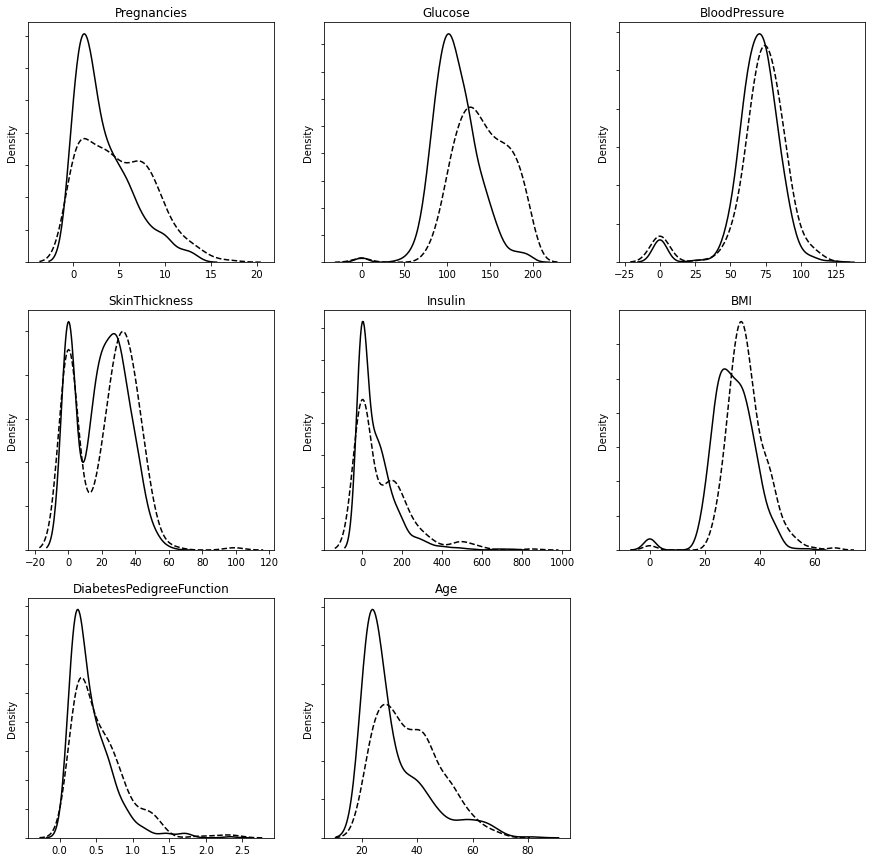

In [3]:
import seaborn as sns
# create a subplot of 3 * 3 
plt.subplots(3,3,figsize = (15,15))
#plot a density plot for each variable
for idx, col in enumerate(df.columns):
  ax = plt.subplot(3, 3, idx+1)
  ax.yaxis.set_ticklabels([])
  sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel = False,
  kde_kws={'linestyle':'-',
  'color':'black','label':"No Diabetes"})
  sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel = False,
  kde_kws= {'linestyle':'--',
  'color':'black','label':"Diabetes"})
  ax.set_title(col)

#Hide  the 9th subplot (bottom right) since there are onlyy 8 plots
plt.subplot(3,3,9).set_visible(False)
plt.show()

**Data preprocessing**

In [4]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [5]:
print(df.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [6]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col + ":" + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [10]:
#replacing 0 values with NaN. Pandas will understand these values are invalid.
import numpy as np
df['Glucose'] = df['Glucose'].replace(0, np.NaN)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.NaN)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.NaN)
df['Insulin'] = df['Insulin'].replace(0, np.NaN)
df['BMI'] = df['BMI'].replace(0, np.NaN)

In [13]:
print("Number of Rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col + ":" + str(missing_rows))

Number of Rows with 0 values for each variable
Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [17]:
#replacing nan values with the mean of the non-missing values.
#for this reason we will use fillna() in Pandas
df['Glucose']= df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

**Data standardization**

In [19]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
#since the object returned is not Dataframe, we have to convert it.
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
#we do not want to scale the outcome, we use the original one
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [20]:
print(df.describe().loc[['mean', 'std', 'max'],].round(2).abs())

      Pregnancies  Glucose  ...   Age  Outcome
mean         0.00     0.00  ...  0.00     0.35
std          1.00     1.00  ...  1.00     0.48
max          3.91     2.54  ...  4.06     1.00

[3 rows x 9 columns]


**Splitting the data**

In [26]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns!= 'Outcome']
y = df.loc[: ,  'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.2)

**MLPs**

In [27]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
#Add the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 8))
#Add the second hidden layer
model.add(Dense(16, activation = 'relu'))
#Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

**Model Compilation**

In [29]:
#compile the model
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


**Model training**

In [30]:
#Train the model for 200 epochs
model.fit(X_train, y_train, epochs= 200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 0.6641 - accuracy: 0.6381
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7343
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7566
Epoch 4/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7563
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7736
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8008
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7948
Epoch 8/200
20/20 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7664
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7620
Epoch 10/200
20/20 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7748
Epoch 11/

**Testing accuracy**

In [31]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy : %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy : %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.9055
Training Accuracy : 90.55%

5/5 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8961
Testing Accuracy : 89.61%



**Confusion Matrix**

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(33.0, 0.5, 'Actual')

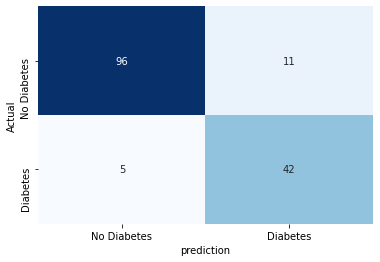

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True,
                 xticklabels = ['No Diabetes' , 'Diabetes'],
                 yticklabels = ['No Diabetes' , 'Diabetes'],
                 cbar = False, cmap= 'Blues')
ax.set_xlabel("prediction")
ax.set_ylabel("Actual")

**ROC curve**

Text(0, 0.5, 'True Positive Rate')

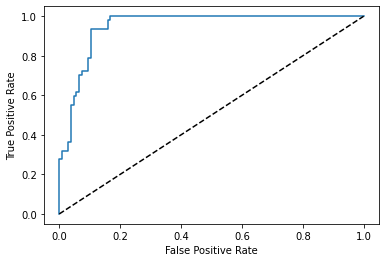

In [40]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--', color = 'black') #diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
  